DA

## Data Preprocessing

### Importing the Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns
import pymongo
from datetime import datetime

# Import the Datasets

In [90]:
%%time
df_InfoUser = pd.read_csv('Untitled Folder/kaggle/learning-activity-public-dataset-by-junyi-academy/Info_UserData.csv')
df_LogProblem = pd.read_csv('Untitled Folder/kaggle/learning-activity-public-dataset-by-junyi-academy/Log_Problem.csv')
df_InfoContent = pd.read_csv('Untitled Folder/kaggle/learning-activity-public-dataset-by-junyi-academy/Info_Content.csv')

Wall time: 1min 20s


Set the index to become the ‘month’ column:

In [84]:
df_InfoUser = df_InfoUser.set_index('uuid')

In [97]:
df_LogProblem = df_LogProblem.set_index('timestamp_TW')

In [74]:
df_InfoContent = df_InfoContent.set_index('ucid')

,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
ucid,,,,,,,,,
odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
...,...,...,...,...,...,...,...,...,...
NPkrCjbLK35wefMCv6y6XMO5eYO/gthS6LGwrdjG2OQ=,【進階】平方公分綜合習題,Exercise,hard,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,JtYpwXqNWwRqPrXYh0JhE2lEEUI1gKRPdDH3jYwhqMo=
3xqxJN2W+KEo3SBjh7HnXpGjB4ewSbm1j/18fCn05yc=,【進階】周長與面積綜合習題,Exercise,hard,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,Ny1/uHUXA4pvWVN1nVWv+vsdaQde7StyoQV8HAyJD80=
j4rGpwpqhLE9foelXD2yjokS0u3QR+ULhNqLGeF/4sk=,【一般】平方公分綜合習題,Exercise,normal,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,JtYpwXqNWwRqPrXYh0JhE2lEEUI1gKRPdDH3jYwhqMo=


In [3]:
# set seed for reproducibility
np.random.seed(0) 

In [83]:
df_InfoUser.head(5)

,uuid,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
0,Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,NaN,18300,1,2019-01-24,1,kh,0,False,0,0,0
1,lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,NaN,6468,0,2019-01-24,1,ntpc,1,False,0,1,0
2,ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0
3,J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,NaN,15525,1,2019-01-24,2,ntpc,0,False,0,0,0
4,qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,NaN,7945,0,2019-01-24,2,km,1,False,0,1,0


In [62]:
# get the number of missing data points per column
missing_values_count = df_InfoUser.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

uuid                       0
gender                 39853
points                     0
badges_cnt                 0
first_login_date_TW        0
user_grade                 0
user_city                  0
has_teacher_cnt            0
is_self_coach              0
has_student_cnt            0
dtype: int64

In [63]:
# how many total missing values do we have?
total_cells = np.product(df_InfoUser.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

4.564561056287052


In [58]:
df_LogProblem.head(5)

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
0,2019-05-26 21:00:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,KDOmuTrY/IJzDP4kIgIYCBiGyTymsJ8Iy4cDB35WGYg=,Vbs92l4JmdiWkUEm/iahxnUTaac2oN1IlUtXB7JcfoE=,18,2,True,33,1,0,False,False,True,3
1,2019-05-17 16:30:00 UTC,+Gqj2nalc6M9fusyVECTC0AN7UQdDQTXESIuElkDltU=,COZ39Wo+uIUO2s7c2VGEHjJf6Vx0xifxVAiaeHtaTdk=,Ek+pIeHNNoEo0tGEq91eBcBmGgy3+A5RWhpj95zTyHM=,4,1,True,8,1,0,False,NaN,NaN,0
2,2019-05-15 19:15:00 UTC,6D5QN8j8ng/VR74ES3A0zqAj0bIFFyaKjKEj8ZyXjQ8=,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,1MBa2f5Qog4JBoAuUfJf0fxeJctdEirAqKgfsg246eI=,9,1,True,17,1,0,False,NaN,NaN,0
3,2019-05-05 14:45:00 UTC,GgTZuCqZXObthtK6GAwqvlHrTMm5pKHWeezQxL/pcKc=,tBo6ECyT8IlKAM8UhQHWkqv92PRLcSiwuerfC7vNX+w=,kdMy2nG+QVMjPkuaMEWs0yV/sYZVoG1vm7zM0fCy+qk=,2,1,True,10,1,0,False,NaN,NaN,0
4,2019-05-14 16:45:00 UTC,JMNKWoU0CkMSzgQ8bCnmCYlD8jEzAVge3lHMYLXKM2g=,vVpSKAMQbTMvtdERR0ksOeRmmaFt0R210t4Z//0RpPA=,jjPR8fmkLSFoCQQYB4g6kI8mgdcK3sKtMirKUvfmZIk=,6,1,True,98,1,0,False,NaN,NaN,0


In [64]:
# get the number of missing data points per column
missing_values_count = df_LogProblem.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

timestamp_TW                       0
uuid                               0
ucid                               0
upid                               0
problem_number                     0
exercise_problem_repeat_session    0
is_correct                         0
total_sec_taken                    0
total_attempt_cnt                  0
used_hint_cnt                      0
dtype: int64

In [65]:
# how many total missing values do we have?
total_cells = np.product(df_LogProblem.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

12.716585910662289


In [60]:
df_InfoContent.head(5)

,ucid,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
0,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
1,dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
2,C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
3,jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
4,M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=


In [66]:
# get the number of missing data points per column
missing_values_count = df_InfoContent.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

ucid                   0
content_pretty_name    0
content_kind           0
difficulty             0
subject                0
learning_stage         0
level1_id              0
level2_id              0
level3_id              0
level4_id              0
dtype: int64

In [68]:
# replace all NA's with 0
df_InfoUser.fillna('na')

,uuid,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
0,Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,na,18300,1,2019-01-24,1,kh,0,False,0,0,0
1,lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,na,6468,0,2019-01-24,1,ntpc,1,False,0,1,0
2,ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0
3,J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,na,15525,1,2019-01-24,2,ntpc,0,False,0,0,0
4,qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,na,7945,0,2019-01-24,2,km,1,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
72753,ESAeVlIpxgtgb2EtZb8K+plFLqKch5ffAgRzKnQqTQ4=,na,2393,2,2019-01-23,10,tc,1,False,0,1,0
72754,DBQkIr4grFmnG2Aml3+haxfHbxp0kgerOxJfJ9JEWpE=,na,1283,0,2019-01-23,10,chc,0,False,0,0,0
72755,2KR+J0mQ2231WhAzulTMJ7ZuyKj43bPYbSdefVwOeQc=,na,5059,2,2019-01-23,10,tp,0,False,0,0,0
72756,BAhs3hEK/PGa1ccNoEahYZsn+dOwRT3tPiojc34vMjQ=,female,17030,2,2019-01-23,11,tp,0,False,0,0,0


### Encoding Categorical Variables

Next, we obtain a list of all of the categorical variables in the training data.

We do this by checking the data type (or dtype) of each column. The object dtype indicates a column has text (there are other things it could theoretically be, but that's unimportant for our purposes). For this dataset, the columns with text indicate categorical variables.

In [86]:
# Get list of categorical variables
s = (df_InfoUser.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['gender', 'first_login_date_TW', 'user_city']


In [89]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(df_InfoUser[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = df_InfoUser.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = df_InfoUser.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)

ValueError: Input contains NaN

In [91]:
### Splitting the 

In [93]:
df_LogProblem.groupby('uuid')['total_sec_taken'].mean()

uuid
++5bdNp/LZvGenJ8Brp4n2SfS9d4pu4qA7cF7FQW7hk=     60.400000
++9EkR6syMGk44XpyhOj40cg9xiXwCLS/TwEy+ujrL0=     14.758621
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=     89.800000
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=     37.804878
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=     31.890323
                                                   ...    
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=    130.307692
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=     87.333333
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=     46.907173
zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM=     10.217391
zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=     16.436782
Name: total_sec_taken, Length: 72758, dtype: float64

In [94]:
plt.bar(df_LogProblem.uuid.unique(),df_LogProblem.groupby('uuid')['total_sec_taken'].mean())

<BarContainer object of 72758 artists>

Error in callback <function flush_figures at 0x0000021D22FB7318> (for post_execute):


KeyboardInterrupt: 

In [96]:
df_LogProblem.uuid.unique()

array(['FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=',
       '+Gqj2nalc6M9fusyVECTC0AN7UQdDQTXESIuElkDltU=',
       '6D5QN8j8ng/VR74ES3A0zqAj0bIFFyaKjKEj8ZyXjQ8=', ...,
       'g7XeGqv+sEyomgSQqK1MiD5qY7syNrgPpX5OYZBrC8g=',
       '4Pu17C+sQfnECIAa3jOPraAYg3BZ6Gtc+hPQx0/BPDw=',
       '01kI6Ccg9dh0asr3IGi3fKRgsUG4uSdXX+RHGKt2RTM='], dtype=object)

In [53]:
for index, row in df_InfoContent.iterrows():
    


SyntaxError: unexpected EOF while parsing (<ipython-input-53-76796e0f864d>, line 2)

In [ ]:
l

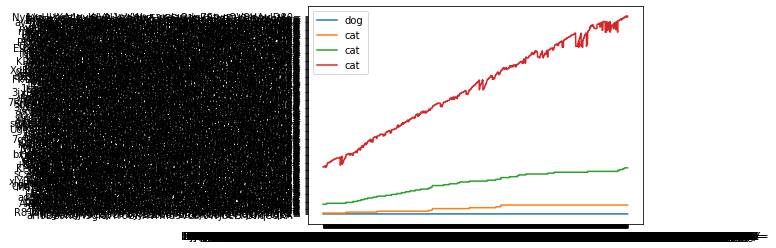

<Figure size 432x288 with 0 Axes>

In [52]:
fig, ax = plt.subplots()
ax.plot(df_InfoContent['ucid'], df_InfoContent['level1_id'], label="dog")
ax.plot(df_InfoContent['ucid'], df_InfoContent['level2_id'], label="cat")
ax.plot(df_InfoContent['ucid'], df_InfoContent['level3_id'], label="cat")
ax.plot(df_InfoContent['ucid'], df_InfoContent['level4_id'], label="cat")
ax.legend()

plt.show()
plt.savefig('a.png')

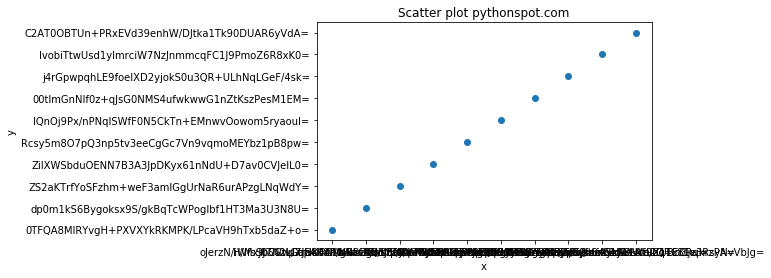

In [4]:
plt.scatter(df_LogProblem.uuid[90:100], df_LogProblem.ucid[90:100])
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
for x in df_LogProblem.uuid.unique():
    plt.plot(df_LogProblem.ucid[df_LogProblem.uuid==x])

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000013DD49A43A8> (for post_execute):


KeyboardInterrupt: 

In [ ]:
df_LogProblem.uuid.unique()

In [29]:
df_LogProblem.ucid[df_LogProblem.uuid=="AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE="]

19249       7TnOWfQ9G1fHRFFRHP2UNZ3SdWfN5I40rfh/K1ZepWc=
106078      iJ+Rpf5Qnw63bObvZLfXRBU4Hmi06Io+lXRGV9hsFgg=
142310      90InnhzKdtZM0H2+oxk5FJn/2H0Ms1RmMgi1UjxE9FI=
198809      cvnGl+iUiKphfjbPcE0G7/HRE/Q51L3w0x0WhVLy1cs=
282765      cvnGl+iUiKphfjbPcE0G7/HRE/Q51L3w0x0WhVLy1cs=
                                ...                     
16028399    o/g95+OW/vglmMGwH72w/A/K5Gc6TB/BDAHowBQDjGQ=
16039926    Q0mRkMzFoFAkNaLsyPYFJoBmC4JdqV9riasp/YCRf/M=
16061414    o/g95+OW/vglmMGwH72w/A/K5Gc6TB/BDAHowBQDjGQ=
16139628    flzEj3Mnu3HFWNtkqEhaKk3L6u5aBJRuGGTTmNC1DR4=
16180614    flzEj3Mnu3HFWNtkqEhaKk3L6u5aBJRuGGTTmNC1DR4=
Name: ucid, Length: 428, dtype: object

In [13]:
df_LogProblem[df_LogProblem['uuid'] == "AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE="]

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
19249,2019-06-21 15:30:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,7TnOWfQ9G1fHRFFRHP2UNZ3SdWfN5I40rfh/K1ZepWc=,zfX244pQp1PLL4WWGoYJJXZkvxo8MP06eycNWUtdFkQ=,2,1,False,45,5,2,True,NaN,NaN,0
106078,2018-09-27 14:45:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,iJ+Rpf5Qnw63bObvZLfXRBU4Hmi06Io+lXRGV9hsFgg=,yqXJXbWA2sTwsIm0dprAGSauF8q9o6qwe1Vu1JcVNtU=,5,1,False,11,2,1,True,NaN,NaN,0
142310,2018-09-27 15:15:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,90InnhzKdtZM0H2+oxk5FJn/2H0Ms1RmMgi1UjxE9FI=,e7h4n+ThBQGajZfbHu1EHBi49LtQBXdCXReSIL+I9oY=,2,1,True,33,1,0,False,NaN,NaN,0
198809,2018-09-20 15:15:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,cvnGl+iUiKphfjbPcE0G7/HRE/Q51L3w0x0WhVLy1cs=,dPpmDVG7i4Rx3/V4OPIcP7NfEwBtedFRP71/iaxDOu8=,8,1,True,63,1,0,False,NaN,NaN,0
282765,2018-08-09 15:30:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,cvnGl+iUiKphfjbPcE0G7/HRE/Q51L3w0x0WhVLy1cs=,zMNsTbk2NmOQiELRznFQbCYx0gCBCgfWSdd+Pyrmrkc=,1,1,True,22,1,0,False,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16028399,2019-05-02 15:45:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,o/g95+OW/vglmMGwH72w/A/K5Gc6TB/BDAHowBQDjGQ=,9hTTP4eKtLgCpYmwRq6PfSKD9ImD56OISUHTMLeH9HU=,13,1,False,11,1,1,True,NaN,NaN,0
16039926,2019-06-20 15:30:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,Q0mRkMzFoFAkNaLsyPYFJoBmC4JdqV9riasp/YCRf/M=,OpIAZ3xLeywyYdGXezdp9xf8mJDuYewlwGUMWEalhPI=,13,1,True,33,1,0,False,NaN,NaN,0
16061414,2019-05-02 15:45:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,o/g95+OW/vglmMGwH72w/A/K5Gc6TB/BDAHowBQDjGQ=,h4ek+3YBa/HDUJofpT4gA5cTvxWt2gpW5tHycp8RrxI=,12,1,False,20,4,1,True,NaN,NaN,0
16139628,2019-05-30 15:45:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,flzEj3Mnu3HFWNtkqEhaKk3L6u5aBJRuGGTTmNC1DR4=,UQO3YHdVKFEIzLYqb8BRpCy4YZiv8dIRXOA6u9qWuMs=,18,1,True,22,1,0,False,NaN,NaN,1


In [ ]:
plt.scatter(df_LogProblem.uuid[df_LogProblem['uuid'] == "AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE="], df_LogProblem.upid[df_LogProblem['uuid'] == "AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE="])
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()